In [17]:
import pandas as pd
import numpy as np
import math
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
import seaborn as sns

In [18]:
df= pd.read_csv(r'C:\Users\Dimitrid\Desktop\Loan_train.csv')

In [19]:
print(df.shape)

(614, 13)


In [20]:
# Check how many null values exist in each columns
for i in df.columns:
    print(i, ':', df_train[i].isnull().sum())

Loan_ID : 0
Gender : 13
Married : 3
Dependents : 0
Education : 0
Self_Employed : 32
ApplicantIncome : 0
CoapplicantIncome : 0
LoanAmount : 22
Loan_Amount_Term : 14
Credit_History : 0
Property_Area : 0
Loan_Status : 0


In [21]:
# fill the nan of the gender column with the most common value of the column    
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)

In [22]:
# fill the nan of the married status column with the most common value of the column
df['Married'].fillna(df['Married'].mode()[0], inplace=True)

In [23]:
# fill the nan of the credit history column with the existing ratio of credit history since we are missing a larges amount of values
df['Credit_History'].fillna(pd.Series(np.random.choice([1,0],p=[0.85,0.15],size=len(df))),inplace=True)

In [24]:
#fill the nan of the dependents column with with the existing ratio of the column
df['Dependents'].fillna(pd.Series(np.random.choice(['0','1','2','3+'],p=[0.55,0.18,0.18,0.09],size=len(df))),inplace=True)

In [25]:
#fill the nan of the self employment status column with with the existing ratio of the column
df['Self_Employed'].fillna(pd.Series(np.random.choice(['No','yes'],p=[0.80,0.20],size=len(df))),inplace=True)

# fill the nan of the loan amount with the mean of the column
df['LoanAmount'].fillna(math.ceil(df['LoanAmount'].mean()),inplace=True)

#fill the nan of the loan amount term with the mean of the column
df['Loan_Amount_Term'].fillna(math.ceil(df['Loan_Amount_Term'].mean()),inplace=True)

df['LoanAmount']=df['LoanAmount'].astype(int)

C:\Users\Dimitrid\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


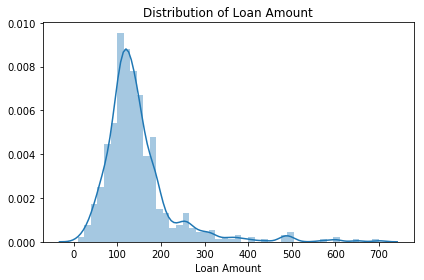

In [26]:
# Plots a distribution plot for the loan amount
plt.figure()
sns.distplot(df['LoanAmount'])
plt.xlabel('Loan Amount')
plt.title('Distribution of Loan Amount')
plt.tight_layout()
plt.show()


In [27]:
# Normalizes the loan amount so outliners do not have a major affect in the example
df['LoanAmount_log'] = np.log(df['LoanAmount'])

C:\Users\Dimitrid\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


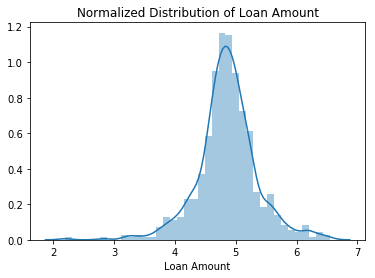

In [28]:
# Plots a distributions plot after the normalazation of the column
plt.figure()
sns.distplot(df['LoanAmount_log'])
plt.xlabel('Loan Amount')
plt.title('Normalized Distribution of Loan Amount')
plt.show()

In [29]:
# Add the applicant's income and the co-applicant income
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']

C:\Users\Dimitrid\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


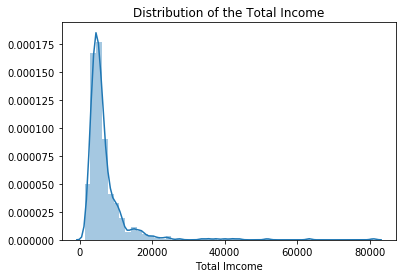

In [30]:
# Plots the Distribution of the total Income.
plt.figure()
sns.distplot(df['TotalIncome'])
plt.xlabel('Total Imcome')
plt.title('Distribution of the Total Income')
plt.show()

In [31]:
# Normalizes the total income column
df['TotalIncome_log'] = np.log(df['TotalIncome'])

C:\Users\Dimitrid\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


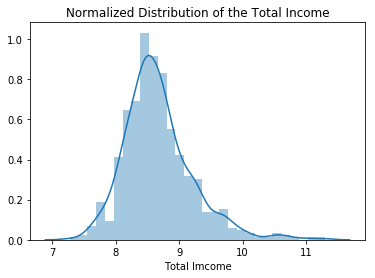

In [32]:
# Plots the normalized Distribution of the total Income.
plt.figure()
sns.distplot(df['TotalIncome_log'])
plt.xlabel('Total Imcome')
plt.title('Normalized Distribution of the Total Income')
plt.show()


In [33]:
# Creates dummies for the Logistic regression
df_Gender = pd.get_dummies(df['Gender'])
df_Married = pd.get_dummies(df['Married'])

df['Dependents']=df['Dependents'].map({'0':0,'1':1,'2':2,'3+':4})
df['Dependents'].reset_index()

df_education = pd.get_dummies(df['Education'])
df_employmen= pd.get_dummies(df['Self_Employed'])
df_property= pd.get_dummies(df['Property_Area'])

df['Loan_Status']=df_train['Loan_Status'].map({'Y':1,'N':0})
df['Loan_Status'].reset_index()

data_final = pd.concat([df, df_Gender, df_Married, df_education, df_employmen,df_property], axis=1)

X = data_final[['Male', 'Female', 'No', 'Yes', 'Graduate', 'Not Graduate', 'No', 'Yes', 'yes', 'Rural', 'Semiurban', 'Urban', 'Dependents','TotalIncome_log', 'LoanAmount_log', 'Loan_Amount_Term', 'Credit_History']]
y = data_final['Loan_Status']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=0)

model= LogisticRegression()

model.fit(X_train,y_train)

predict= model.predict(X_test)

print('The accuracy of the model is:\n')
print(accuracy_score(y_test,predict))

The accuracy of the model is:

0.8216216216216217


C:\Users\Dimitrid\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
